In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import yaml

import sys
sys.path.insert(0, r"../helper")

from visualisation.colour import *


In [2]:
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{68}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{70}/metrics.csv')

#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{72}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{87}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{96}/metrics.csv')



In [41]:
the_dir = "../examples/example_results/lightning_logs/every3_95/version_1"

tmp_path = os.path.join(the_dir, "final_plots")
os.makedirs(tmp_path, exist_ok=True)

df = pd.read_csv(os.path.join(the_dir, 'metrics.csv'))
df

,lr-SGD,step,val_acc,val_f1_macro,val_f1_micro,val_prec,val_rec,val_ce_loss,val_cc,val_loss,...,train_acc,train_f1_macro,train_f1_micro,train_prec,train_rec,train_ce_loss,train_cc,train_loss,unpruned,unpruned_state
0,0.001000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,124,0.464508,0.423780,0.64,0.410667,0.464508,1.075074,0.757812,4.864136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448426,0.387490,0.566,0.388391,0.448426,1.133869,0.766250,4.965120,5980.0,-1.0
3,0.001000,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,249,0.531429,0.480897,0.66,0.477333,0.531429,0.926376,0.757812,4.715438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,4124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.644833,0.606580,0.752,0.604168,0.644833,0.699965,0.898438,5.192155,4368.0,1.0
99,0.000757,4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,4249,0.627238,0.564301,0.72,0.558444,0.627238,0.900811,0.882812,5.314873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,4249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.630100,0.587233,0.748,0.590101,0.630100,0.749059,0.882812,5.163122,4147.0,-1.0


In [42]:
stream = open(os.path.join(the_dir, 'hparams.yaml'), 'r')
data = yaml.load(stream, Loader=yaml.Loader)
data

{'kwargs': {'model_kwargs': {'base_lr': 0.001,
   'cc_metric': 'l2_torch',
   'cc_weight': 5,
   'ci_metric': 'l2',
   'cm_metric': 'not implemented yet',
   'criterion': CrossEntropyLoss(),
   'grid_size': 324,
   'in_channels': 1,
   'lr_update': 100,
   'min_lr': 1e-05,
   'momentum': 0.9,
   'n_classes': 4,
   'new_cc_mode': True,
   'optimizer': 'sgd',
   'out_dim': [1, 8, 16, 32, 4],
   'pretrain_epochs': 15,
   'prune_keep': 0.95,
   'prune_keep_total': 0.4,
   'reset_optimiser_at_update': True,
   'update_every_nth_epoch': 3},
  'train_kwargs': {'batch_size': 8,
   'dataset': 'octmnist',
   'device': 'cuda',
   'epochs': 40,
   'exp_name': 'every3_95',
   'img_size': 28,
   'input_data_csv': ['data_prep/data_octa500.csv'],
   'load_ckpt_file': 'version_16/checkpoints/mu_epoch=8-val_f1_macro=0.64-unpruned=2373.ckpt',
   'load_mode': False,
   'log_every_n_steps': 50,
   'num_workers': 0,
   'octa500_id': 199,
   'p_augment': 0.2,
   'result_path': 'examples/example_results',
   

In [43]:
cc_metric = data['kwargs']['model_kwargs']['cc_metric']

In [44]:
ci_metric = data['kwargs']['model_kwargs']['ci_metric']

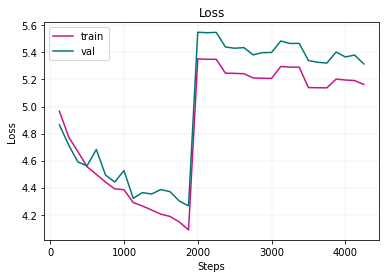

In [45]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_loss']

train_df = df[['step', 'train_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0,1.2])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_loss.png'))

# Show the plot
plt.show()



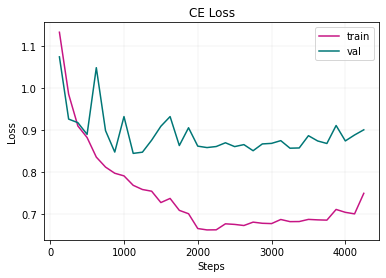

In [46]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_ce_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_ce_loss']

train_df = df[['step', 'train_ce_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_ce_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('CE Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0,1.2])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_ce_loss.png'))

# Show the plot
plt.show()



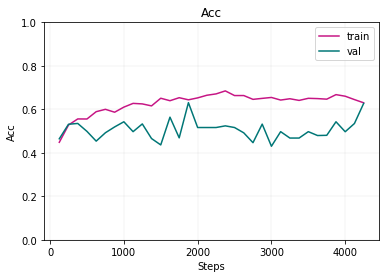

In [47]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_acc']].dropna()
x_val = val_df['step']
y_val = val_df['val_acc']

train_df = df[['step', 'train_acc']].dropna()
x_train = train_df['step']
y_train = train_df['train_acc']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Acc')
plt.title('Acc')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])


plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_acc.png'))


# Show the plot
plt.show()


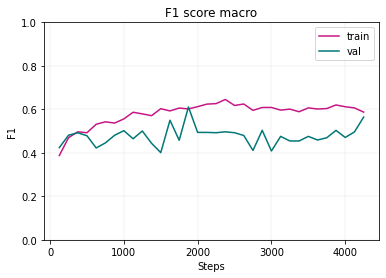

In [48]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_f1_macro']].dropna()
x_val = val_df['step']
y_val = val_df['val_f1_macro']

train_df = df[['step', 'train_f1_macro']].dropna()
x_train = train_df['step']
y_train = train_df['train_f1_macro']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('F1')
plt.title('F1 score macro')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_f1_macro.png'))

# Show the plot
plt.show()


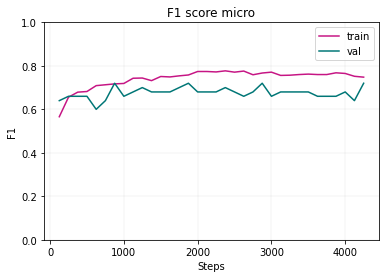

In [49]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_f1_micro']].dropna()
x_val = val_df['step']
y_val = val_df['val_f1_micro']

train_df = df[['step', 'train_f1_micro']].dropna()
x_train = train_df['step']
y_train = train_df['train_f1_micro']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('F1')
plt.title('F1 score micro')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_f1_micro.png'))

# Show the plot
plt.show()


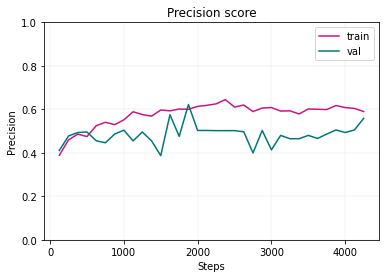

In [50]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_prec']].dropna()
x_val = val_df['step']
y_val = val_df['val_prec']

train_df = df[['step', 'train_prec']].dropna()
x_train = train_df['step']
y_train = train_df['train_prec']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Precision score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_prec.png'))


# Show the plot
plt.show()


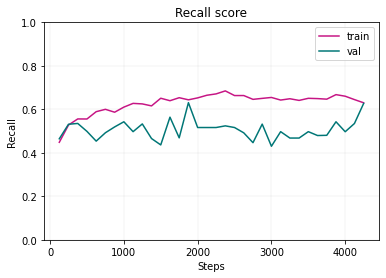

In [51]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_rec']].dropna()
x_val = val_df['step']
y_val = val_df['val_rec']

train_df = df[['step', 'train_rec']].dropna()
x_train = train_df['step']
y_train = train_df['train_rec']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Recall')
plt.title('Recall score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_rec.png'))


# Show the plot
plt.show()


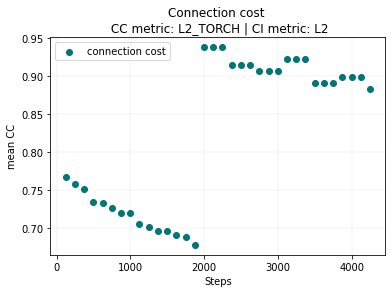

In [69]:
# todo: see how this changes without cc in loss and random pruning!!

import matplotlib.pyplot as plt

train_df = df[['step', 'train_cc']].dropna()
x_train = train_df['step']
y_train = train_df['train_cc']


# Create a line plot
plt.scatter(x_train, y_train, label="connection cost", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('mean CC')
plt.title(f'Connection cost \n CC metric: {cc_metric.upper()} | CI metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0.9374,0.9378])


plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_cc.png'))


# Show the plot
plt.show()


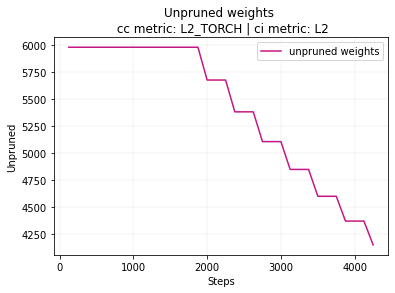

In [53]:
import matplotlib.pyplot as plt

train_df = df[['step', 'unpruned']].dropna()
x_train = train_df['step']
y_train = train_df['unpruned']


# Create a line plot
plt.plot(x_train, y_train, label="unpruned weights", color=variint_map_b.colors[-1])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Unpruned')
plt.title(f'Unpruned weights \n cc metric: {cc_metric.upper()} | ci metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_unpruned.png'))


# Show the plot
plt.show()


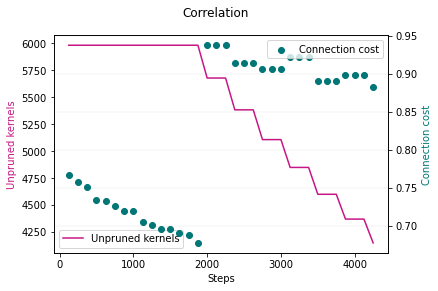

In [54]:
import matplotlib.pyplot as plt
import numpy as np

train_df = df[['step', 'unpruned', 'train_cc']].dropna()
x = train_df['step']
y1 = train_df['unpruned']
y2 = train_df['train_cc']


# Create a figure and a primary axis
fig, ax1 = plt.subplots()

# Plot the line on the primary y-axis (values 0-1)
ax1.plot(x, y1, color=variint_map_b.colors[-1], label='Unpruned kernels')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Unpruned kernels', color=variint_map_b.colors[-1])
ax1.tick_params(axis='y') # , labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the scatter on the secondary y-axis (values around 8000)
ax2.scatter(x, y2, color=variint_map_b.colors[0], label='Connection cost')
ax2.set_ylabel('Connection cost', color=variint_map_b.colors[0])
ax2.tick_params(axis='y') # , labelcolor='red')

# Add a title and show the legend
fig.suptitle('Correlation')
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')

plt.grid(color='k', linestyle='-', linewidth=0.05)


# Display the plot
plt.savefig(os.path.join(tmp_path, 'correlation_pruning_cc.png'))
plt.show()

In [55]:
val_df

,step,val_rec
1,124,0.464508
4,249,0.531429
7,374,0.535111
10,499,0.498603
13,624,0.453778
16,749,0.492317
19,874,0.519111
22,999,0.542794
25,1124,0.497333
28,1249,0.532889


In [56]:
40*300

12000

In [57]:
list(set(df['step']))

[0,
 4249,
 4250,
 4124,
 4125,
 3999,
 4000,
 3874,
 3875,
 3749,
 3750,
 3624,
 3625,
 3499,
 3500,
 3374,
 3375,
 3249,
 3250,
 3124,
 3125,
 2999,
 3000,
 2874,
 2875,
 2749,
 2750,
 2624,
 2625,
 2499,
 2500,
 2374,
 2375,
 2249,
 2250,
 2124,
 2125,
 1999,
 2000,
 1874,
 1875,
 1749,
 1750,
 1624,
 1625,
 1499,
 1500,
 1374,
 1375,
 1249,
 1250,
 1124,
 1125,
 999,
 1000,
 874,
 875,
 749,
 750,
 624,
 625,
 499,
 500,
 374,
 375,
 249,
 250,
 124,
 125]

In [58]:
df['val_loss'].dropna()

1      4.864136
4      4.715438
7      4.589737
10     4.561754
13     4.682014
16     4.492587
19     4.441388
22     4.526155
25     4.321054
28     4.362967
31     4.352608
34     4.385847
37     4.369909
40     4.300711
43     4.265075
46     5.549280
49     5.545873
52     5.548368
55     5.440135
58     5.430990
61     5.435748
64     5.382091
67     5.398323
70     5.399641
73     5.484300
76     5.466237
79     5.466834
82     5.339870
85     5.327280
88     5.321268
91     5.403272
94     5.366447
97     5.380622
100    5.314873
Name: val_loss, dtype: float64